In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import numpy as np

plt.style.use('ggplot')


In [2]:

def plot_predictions(inputs, predictions, targets, title):
    for _ in range(3):
        sample_index = np.random.randint(len(inputs))
        location_index = np.random.randint(15)

        input_sample = inputs[sample_index][:, location_index]
        prediction_sample = predictions[sample_index][:, location_index]
        target_sample = targets[sample_index][:, location_index]

        time_axis_input = np.arange(120)
        time_axis_future = np.arange(120, 132)
        plt.figure(figsize=(12, 6))
        plt.plot(time_axis_input, input_sample, label='Input Data')
        plt.plot(time_axis_future, prediction_sample, label='Predicted Data')
        plt.plot(time_axis_future, target_sample, label='Target Data', linestyle='--')

        plt.title(title)
        plt.xlabel('Time Steps')
        plt.ylabel('Temperature')
        plt.legend()
        plt.show()

def display_test_results(file_path, title):
    with open(file_path, 'rb') as f:
        test_results = pickle.load(f)

    test_loss = test_results['loss']
    test_rmse = test_results['rmse']
    test_mae = test_results['mae']
    test_r_squared = test_results['r_squared']
    inputs = test_results['inputs']
    predictions = test_results['predictions']
    targets = test_results['targets']

    print(f"Test Loss: {test_loss} | Test RMSE: {test_rmse} | Test MAE: {test_mae} | Test R^2: {test_r_squared}")
    plot_predictions(inputs, predictions, targets, title)

Test Loss: 0.6764849126338959 | Test RMSE: 0.8158627969247324 | Test MAE: 0.6243575877613492 | Test R^2: -15.798513115655203


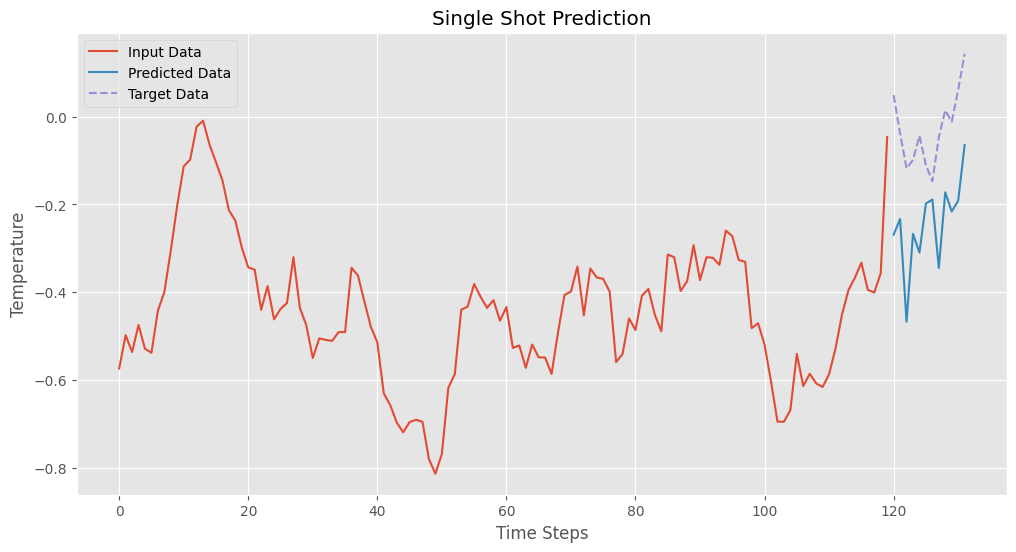

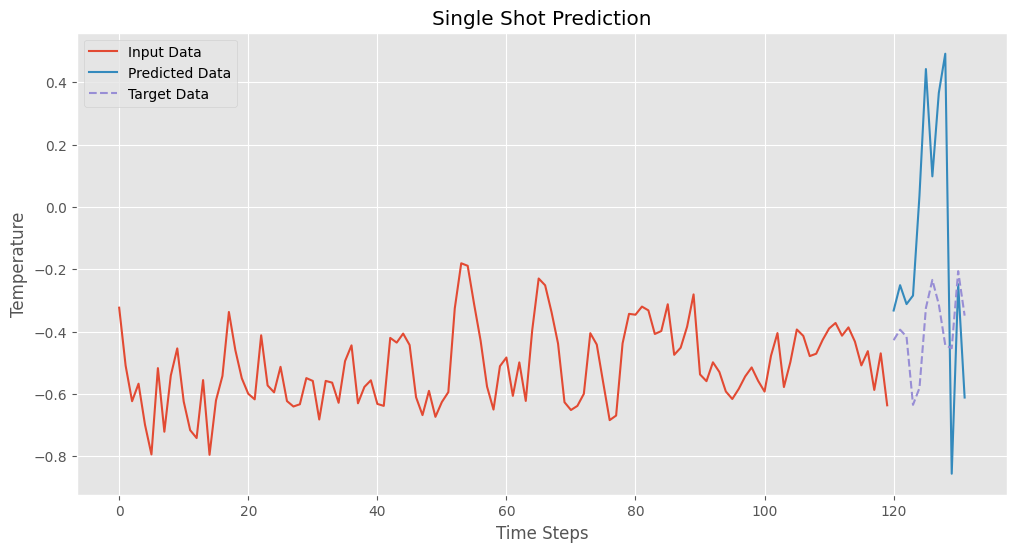

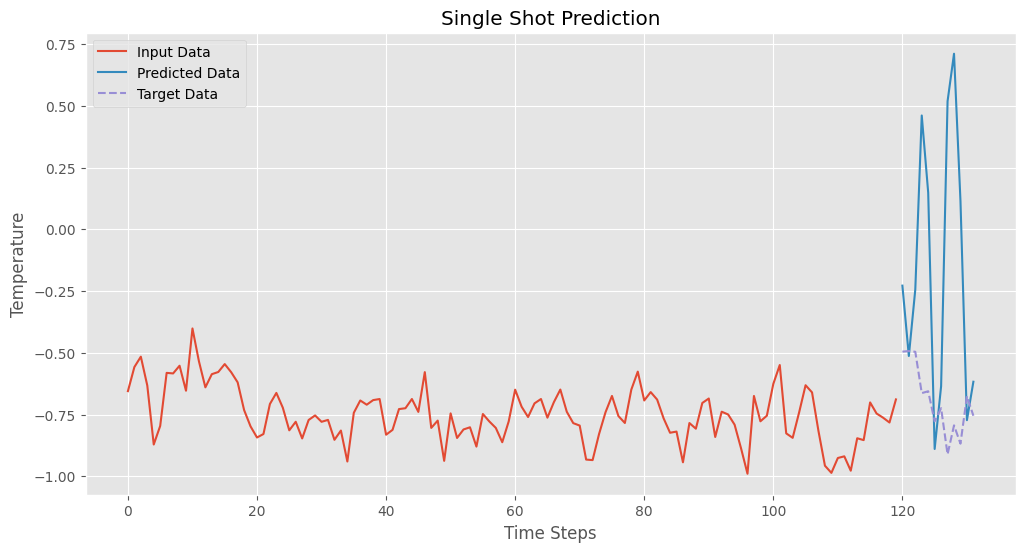

In [3]:
display_test_results('results/single_shot_test_results.pkl', 'Single Shot Prediction')

Test Loss: 0.5373042556974623 | Test RMSE: 0.7291742165883383 | Test MAE: 0.553226915774522 | Test R^2: -12.74346476530237


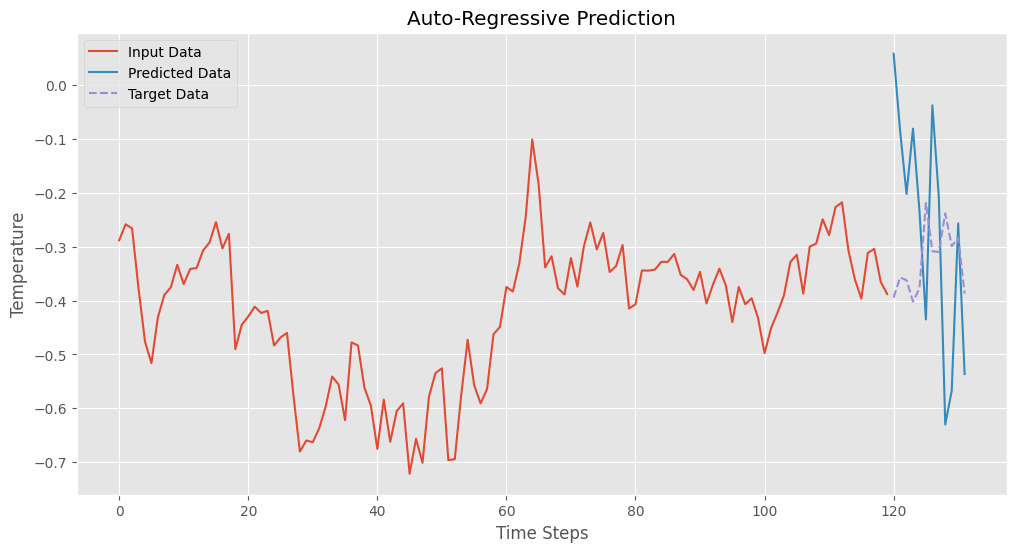

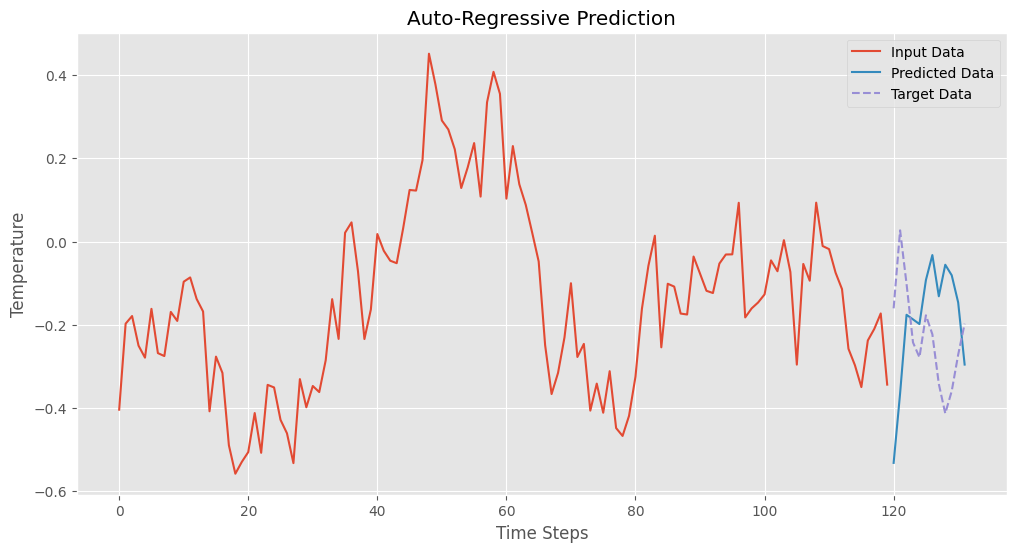

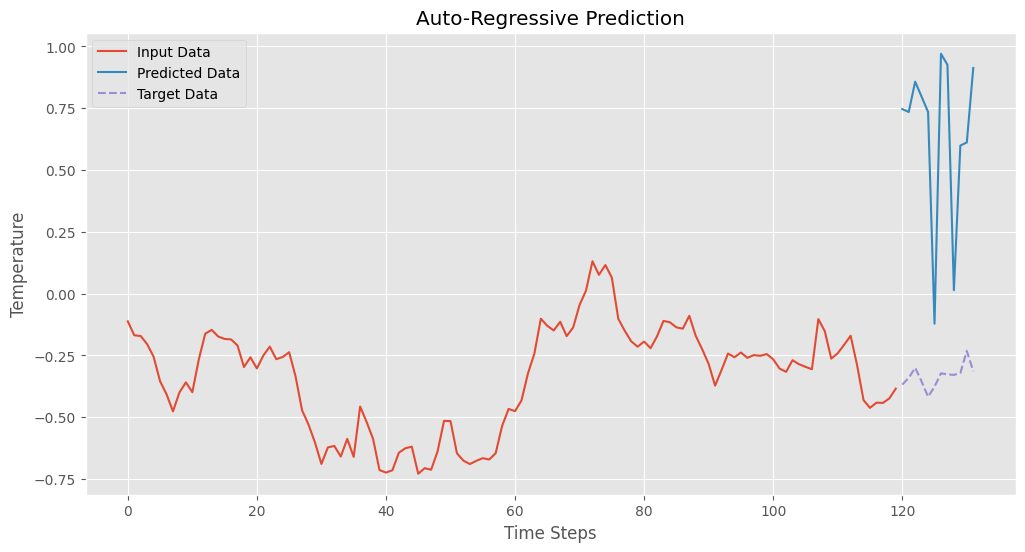

In [4]:
display_test_results('results/auto_reg_test_results.pkl', 'Auto-Regressive Prediction')

Test Loss: 0.7298105778517546 | Test RMSE: 0.8469266140902484 | Test MAE: 0.6438630157046847 | Test R^2: -18.27343357748993


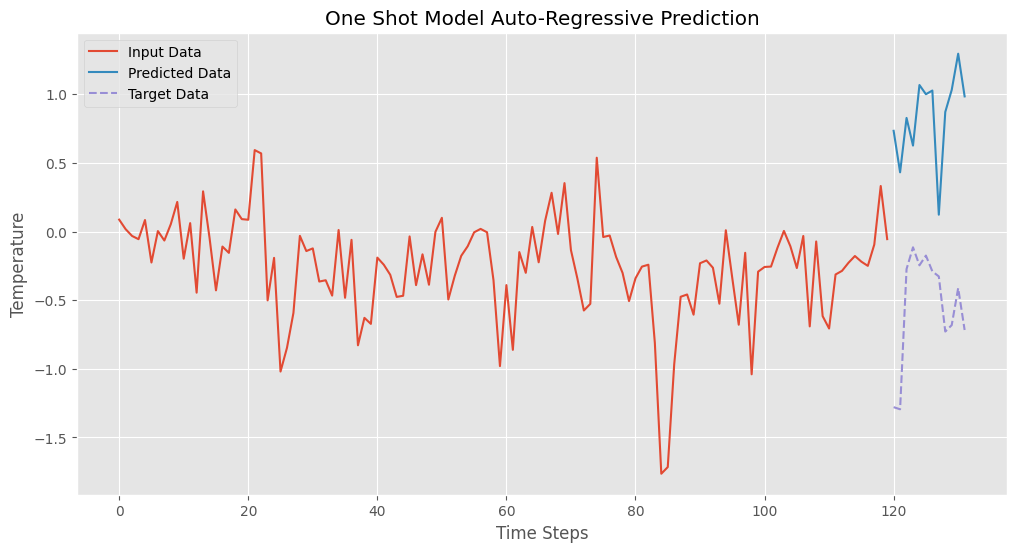

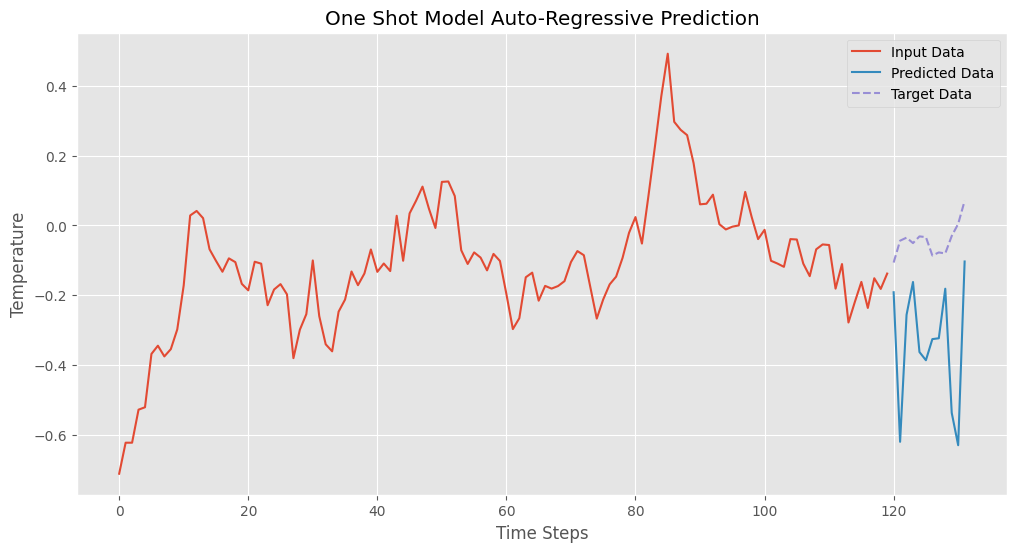

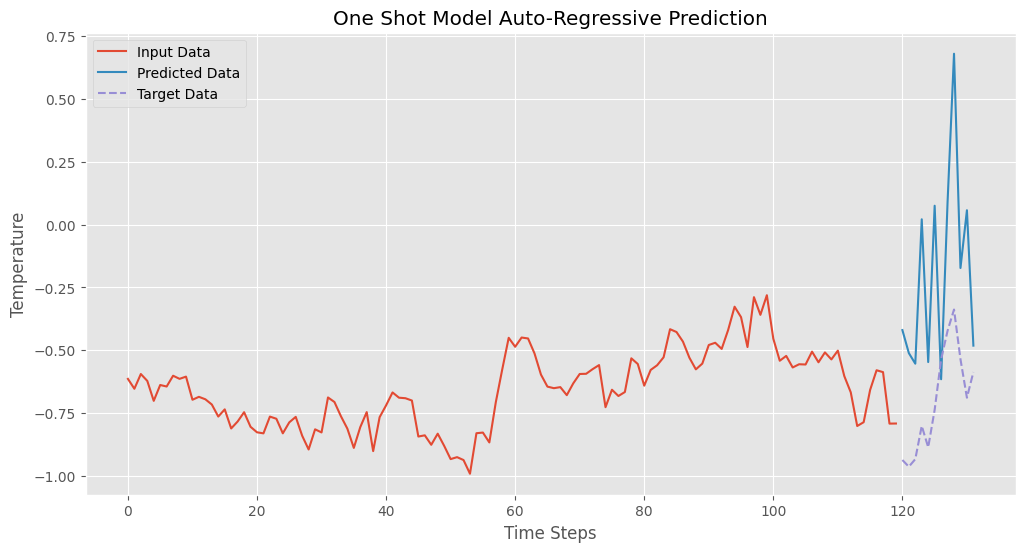

In [5]:
display_test_results('results/auto_reg_single_shot_test_results.pkl', 'One Shot Model Auto-Regressive Prediction')


### Full Predictions

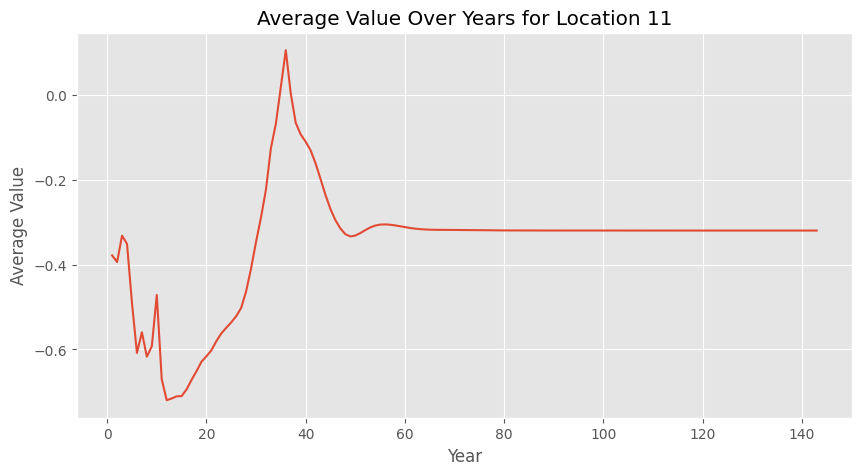

In [46]:
with open("results/full_data_prediction.pkl", 'rb') as f:
        full_results = pickle.load(f)


full_inputs = full_results['inputs']
full_inputs = np.array(full_inputs)

full_predictions = full_results['predictions']
full_predictions = np.array(full_predictions)
yearly_data = full_predictions.reshape(-1, 12, full_predictions.shape[1])

year_results = np.mean(yearly_data, axis=1)

# Choose a random location (feature) to plot
random_location = np.random.randint(0, year_results.shape[1])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, year_results.shape[0] + 1), year_results[:, random_location])
plt.title(f'Average Value Over Years for Location {random_location + 1}')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

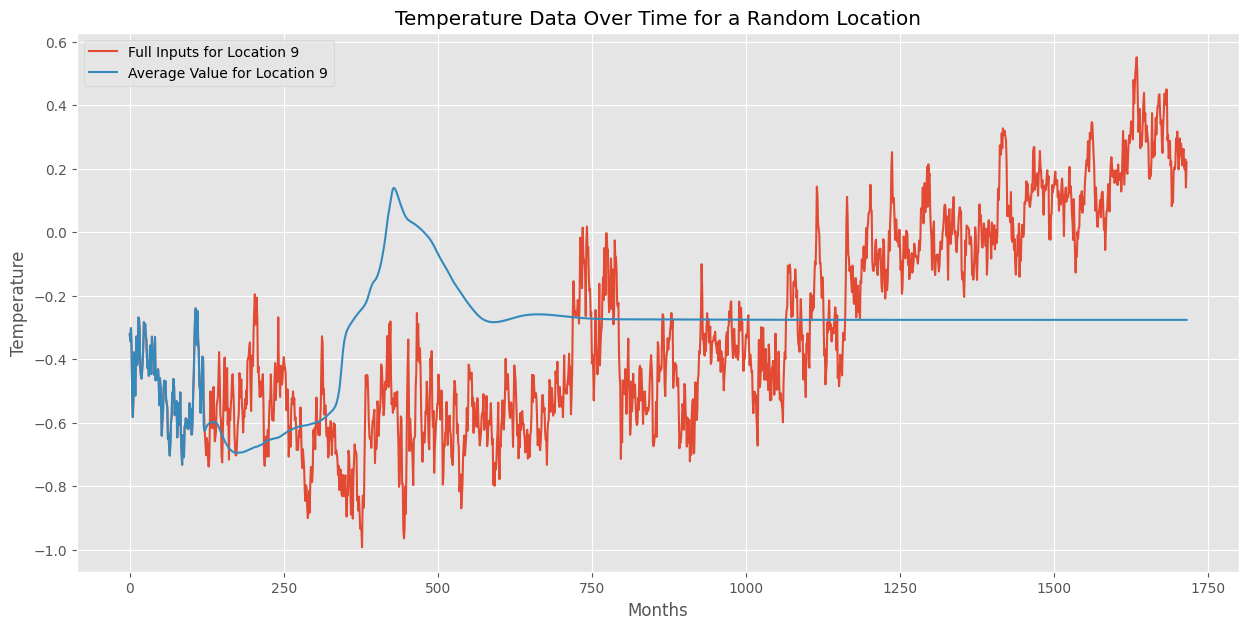

In [44]:
# Select a random location index
location_index = np.random.randint(15)  # Adjust the number if you have a different number of locations

# Compute the monthly average for each location
monthly_average = np.mean(full_predictions.reshape(-1, 12, full_predictions.shape[1]), axis=0)

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(full_inputs[:, location_index], label=f'Full Inputs for Location {location_index}')
plt.plot(full_predictions[:, location_index], label=f'Average Value for Location {location_index}')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Temperature Data Over Time for a Random Location')
plt.legend()